# Dask Array

Материалы:
* Макрушин С.В. Лекция 11: Dask
* https://docs.dask.org/en/latest/array.html
* JESSE C. DANIEL. Data Science with Python and Dask.

## Задачи для совместного разбора

1. Создайте массив размерностью 1000 на 300000, заполненный числами из стандартного нормального распределения. Исследуйте основные характеристики полученного массива.

In [ ]:
import dask.array as da
import h5py
import numpy as np

In [ ]:
a = np.random.normal(size=(1000,300000))

In [ ]:
a

array([[-6.56180095e-01,  9.41158243e-01,  1.35170958e+00, ...,
         3.62606061e-02,  2.96829985e-01,  8.35155596e-01],
       [-1.30812710e-01, -1.22224738e+00,  1.84891361e+00, ...,
         1.20668141e+00, -1.17813897e+00,  1.00035755e+00],
       [ 1.87624871e+00,  3.88918109e-01,  1.13425261e+00, ...,
        -1.17776028e+00, -1.08386074e+00, -3.38081519e-01],
       ...,
       [ 1.77873615e+00, -2.60894934e+00, -5.89673704e-01, ...,
        -1.22306912e+00, -1.05901823e+00, -7.16185331e-01],
       [ 1.65826780e+00,  1.71273828e-03, -1.93822657e-01, ...,
         3.76064147e-01,  1.05490821e+00, -1.02908302e+00],
       [-2.38666254e-01,  7.39889666e-01, -3.53374077e-01, ...,
        -5.22312187e-01, -7.12146916e-01, -7.99067621e-01]])

2. Посчитайте сумму квадратов элементов массива, созданного в задаче 1. Создайте массив `np.array` такого же размера и сравните скорость решения задачи с использование `da.array` и `np.array`

In [ ]:
a2 = da.from_array(a)

In [ ]:
a2

dask.array<array, shape=(1000, 300000), dtype=float64, chunksize=(1000, 15000), chunktype=numpy.ndarray>

In [ ]:
%%time
r = da.sum(a2*a2)
r.compute()

CPU times: user 932 ms, sys: 712 ms, total: 1.64 s
Wall time: 916 ms


300003757.38494956

In [ ]:
%%time
np.sum(a*a)

CPU times: user 571 ms, sys: 455 ms, total: 1.03 s
Wall time: 1.02 s


300003757.3849502

3. Визуализируйте граф вычислений для задачи 12.

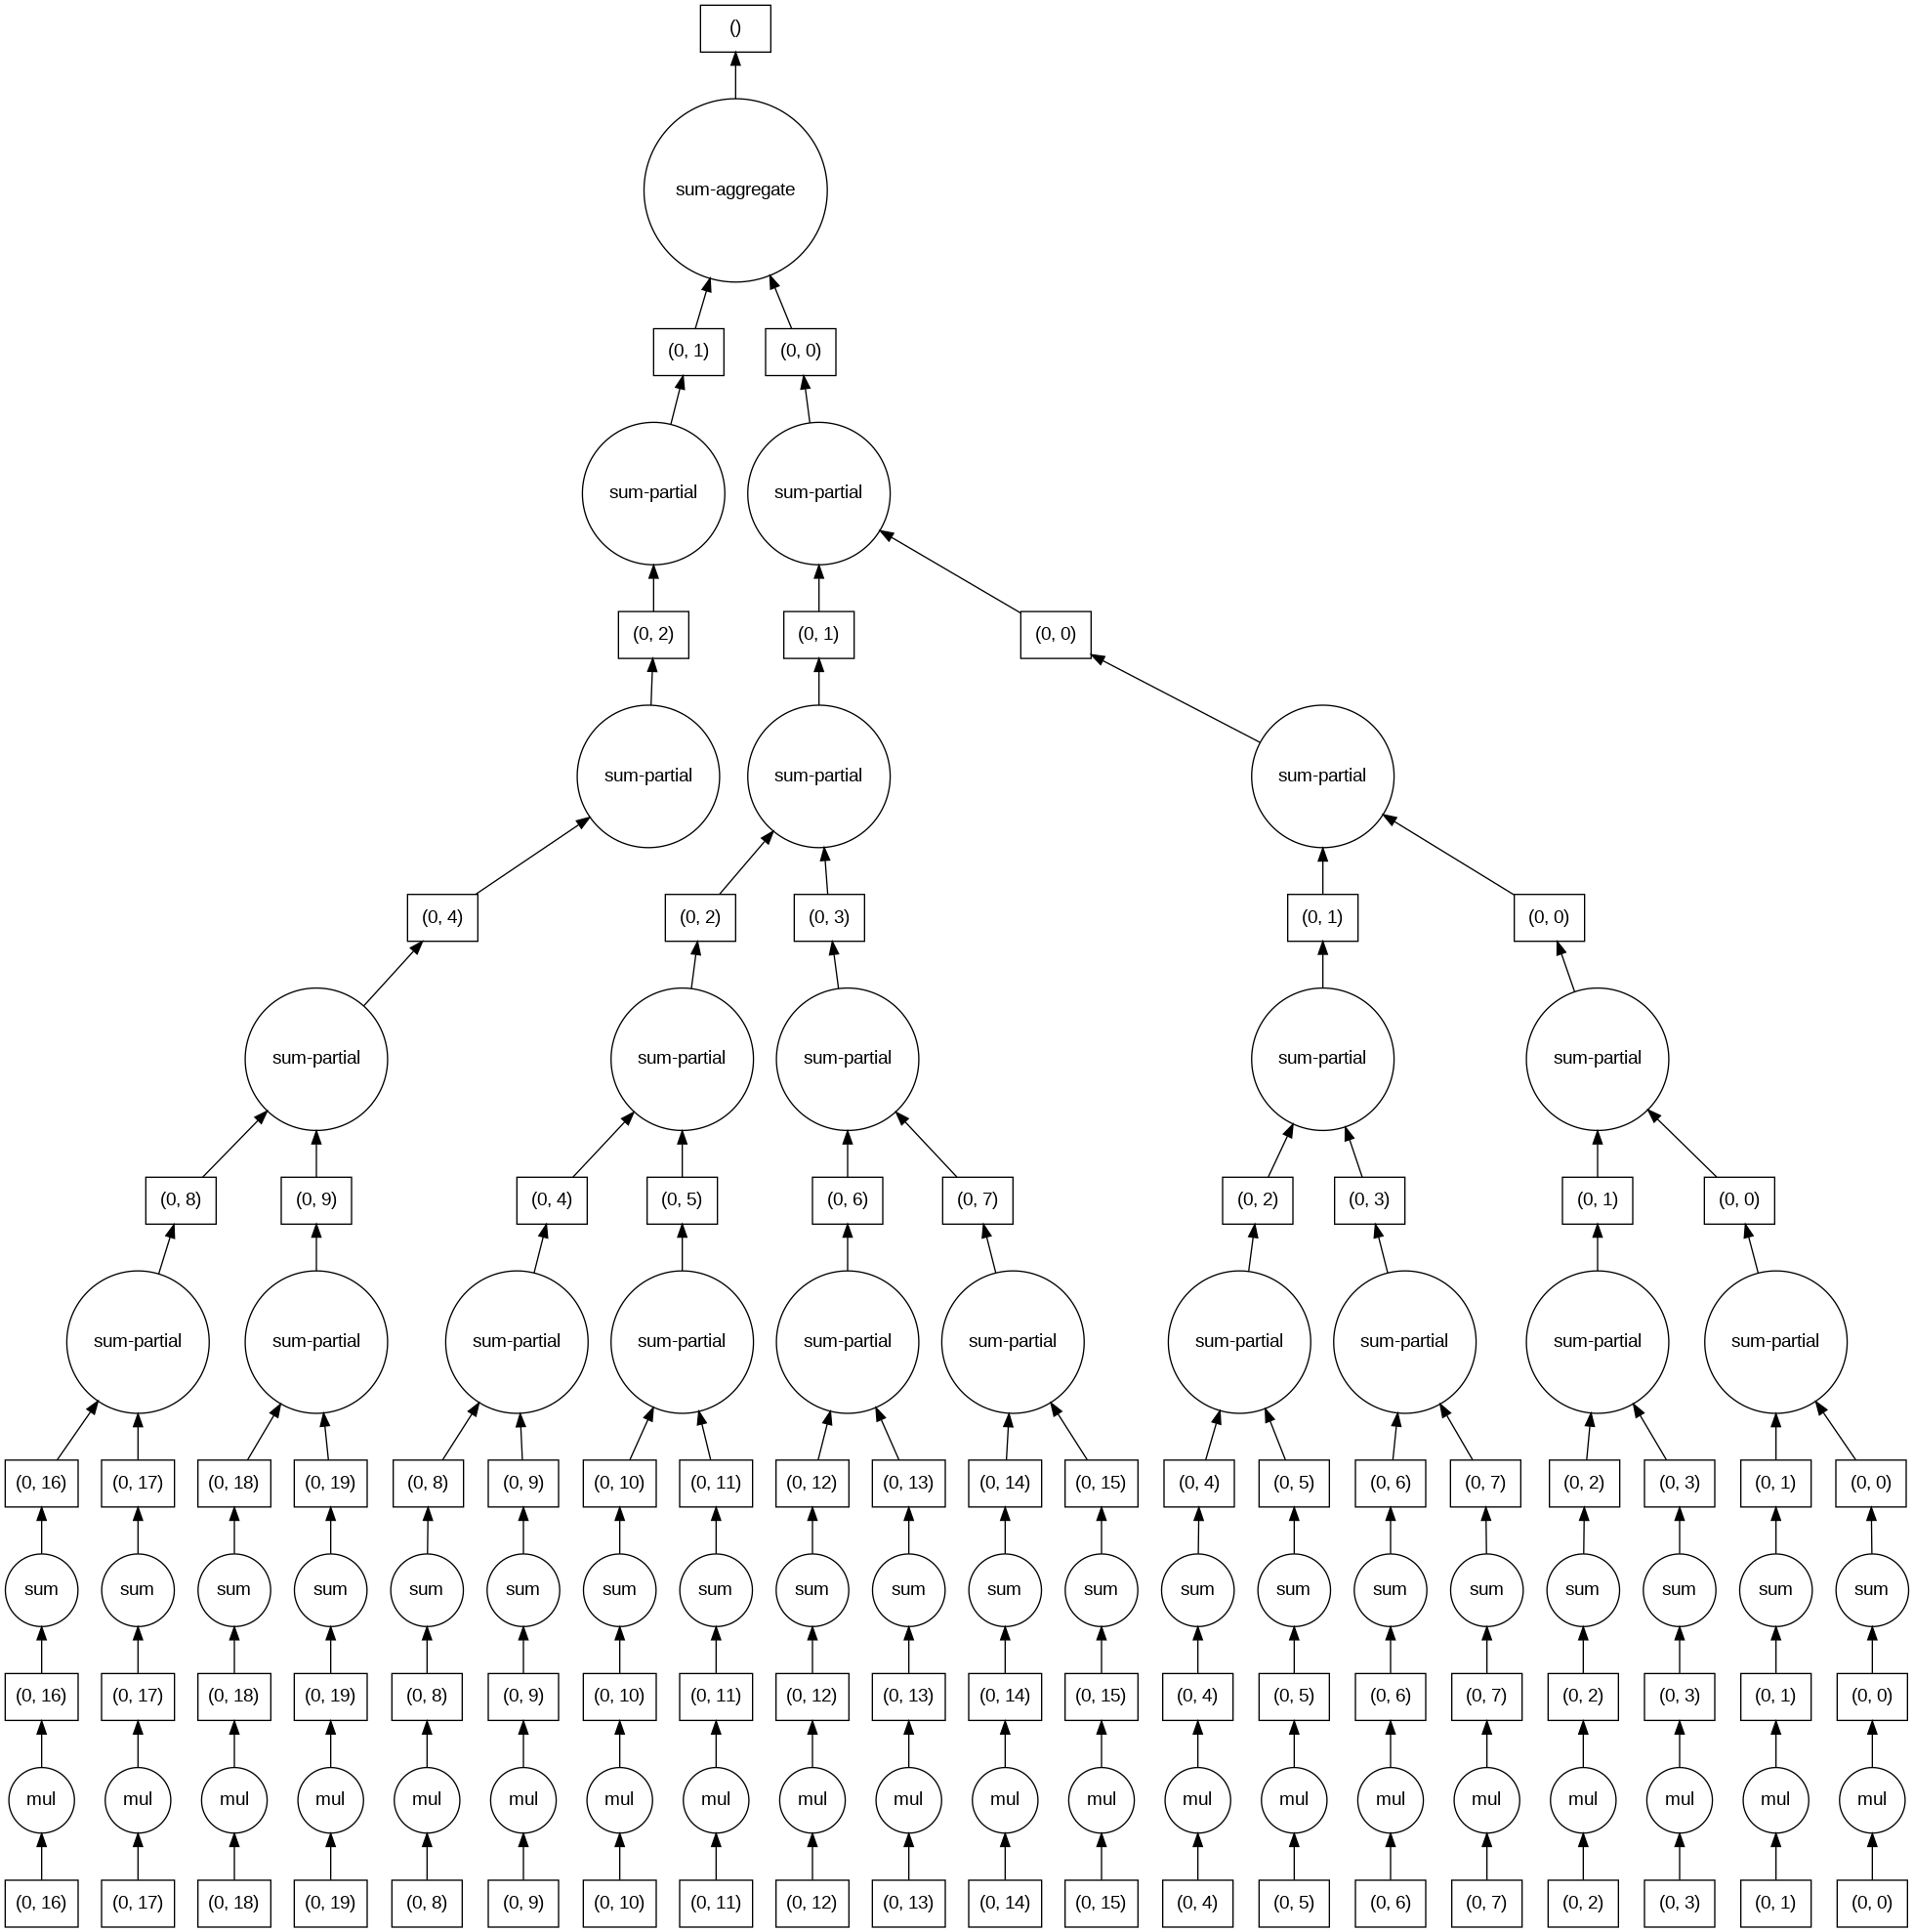

In [ ]:
r.visualize()

## Лабораторная работа 11

In [ ]:
import dask.array as da
import h5py
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/minutes_n_ingredients_full.hdf5'

1. Считайте датасет `recipe` из файла `minutes_n_ingredients_full.hdf5` в виде `dask.array`. Укажите аргумент `chunks=(100_000, 3)` при создании массива. Выведите на экран основную информацию о массиве.

In [ ]:
f = h5py.File(path)
print(list(f.keys()))
data = da.from_array(f['recipe'], chunks=(100_000, 3))

['recipe']


In [ ]:
data

dask.array<array, shape=(2231637, 3), dtype=int64, chunksize=(100000, 3), chunktype=numpy.ndarray>

2. Вычислите среднее значение по каждому столбцу, кроме первого.

In [ ]:
%%time
data[:,1:].mean(axis=0).compute()

CPU times: user 170 ms, sys: 37.2 ms, total: 207 ms
Wall time: 190 ms


array([1004.20805176,    5.4198008 ])

3. Исследуйте, как влияет значение аргумента `chunks` при создании `dask.array` на скорость выполнения операции поиска среднего.

In [ ]:
data = da.from_array(f['recipe'], chunks=(10_000, 3))
data

dask.array<array, shape=(2231637, 3), dtype=int64, chunksize=(10000, 3), chunktype=numpy.ndarray>

In [ ]:
%%time
data[:,1:].mean(axis=0).compute()

CPU times: user 320 ms, sys: 44.3 ms, total: 364 ms
Wall time: 251 ms


array([1004.20805176,    5.4198008 ])

In [ ]:
data = da.from_array(f['recipe'], chunks=(100, 3))
data

dask.array<array, shape=(2231637, 3), dtype=int64, chunksize=(100, 3), chunktype=numpy.ndarray>

In [ ]:
%%time
data[:,1:].mean(axis=0).compute()

CPU times: user 17.8 s, sys: 2.03 s, total: 19.9 s
Wall time: 19 s


array([1004.20805176,    5.4198008 ])

4. Выберите рецепты, время выполнения которых меньше медианного значения

In [ ]:
data1 = data[data[:,1]<da.median(data[:, 1],axis=0)].compute()
data1

array([[1089012,      23,       5],
       [1428572,       0,       5],
       [1400250,      24,       1],
       ...,
       [1029131,      19,       4],
       [1700703,       1,       1],
       [ 713836,       0,       9]])

5. Посчитайте количество каждого из возможных значений кол-ва ингредиентов

In [ ]:
np.unique(np.array(data[:, 2]), return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 43]),
 array([222071, 224158, 229388, 234948, 240720, 244360, 247181, 246747,
        246816,  22430,  19094,  15165,  11640,   8284,   6014,   4145,
          2793,   1913,   1279,    852,    529,    346,    244,    178,
           107,     68,     55,     33,     22,     20,     13,      5,
             4,      3,      4,      1,      2,      1,      1,      2,
             1]))

6. Найдите максимальную продолжительность рецепта. Ограничьте максимальную продолжительность рецептов сверху значением, равному 75% квантилю.

In [ ]:
quantile = np.quantile(data[:, 1], 0.75, axis=0)
data2 = data[data[:, 1] < quantile].compute()
data2

/usr/local/lib/python3.9/dist-packages/dask/array/core.py:1712: FutureWarning: The `numpy.quantile` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(


array([[ 683970,      33,       9],
       [1089012,      23,       5],
       [1428572,       0,       5],
       ...,
       [1029131,      19,       4],
       [1700703,       1,       1],
       [ 713836,       0,       9]])

7. Создайте массив `dask.array` из 2 чисел, содержащих ваши предпочтения относительно времени выполнения рецепта и кол-ва ингредиентов. Найдите наиболее похожий (в смысле $L_1$) рецепт из имеющихся в датасете.

In [ ]:
d = da.from_array([10, 2])
d.compute()

array([10,  2])

In [ ]:
# Вычисляем расстояние Л1 между target и каждой строкой в массиве recipe
l1_distance = da.abs(data[:,1:] - d).sum(axis=1)

idx_min_distance = da.argmin(l1_distance).compute()

# Выводим найденный рецепт и его расстояние от d
print(f"Найденный рецепт: {data[idx_min_distance, :].compute()}")
print(f"Расстояние от d: {l1_distance[idx_min_distance].compute()}")

Найденный рецепт: [250254     10      2]
Расстояние от d: 0


8. Работая с исходным файлом в формате `hdf5`, реализуйте алгоритм подсчета среднего значения в блочной форме и вычислите с его помощью среднее значение второго столбца в массиве.

Блочный алгоритм вычислений состоит из двух частей:
1. Загрузка фрагмента за фрагментом данных по `blocksize` элементов и проведение вычислений на этим фрагментом
2. Агрегация результатов вычислений на различных фрагментах для получения результата на уровне всего набора данных

Важно: при работе с `h5py` в память загружаются не все элементы, а только те, которые запрашиваются в данный момент

In [ ]:
blocksize = 100000
rows_amount = data.shape[0]
summ, count = 0, 0

for i in range(0, rows_amount, blocksize):
    block = data[i:i+blocksize, :]
    block_average = np.sum(block[:, 1]) / blocksize

    summ += block.sum()
    count += len(block)

dataset2_average = summ / count
dataset2_average.compute()

1127850.5169151614